import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("C:\\Users\\karan\\Downloads\\Largest_Companies.csv", encoding = 'latin-1')

Head

In [6]:
df.head()

,Rank,Name,Sales,Profit,Assets,Market Value,Industry,Founded,Headquarters,Country,CEO,Employees
0,1,JPMorgan Chase,252.9,50.0,4090.7,588.1,Banking and Financial Services,2000.0,New York- New York,United States,Jamie Dimon,186751.0
1,2,Berkshire Hathaway,369.0,73.4,1070.0,899.1,Conglomerate,1839.0,Omaha- Nebraska,United States,Warren Edward Buffett,396500.0
2,3,Saudi Arabian Oil Company (Saudi Aramco),489.1,116.9,661.5,1919.3,Construction- Chemicals- Raw Materials,1933.0,Dhahran,Saudi Arabia,Amin bin Hasan Al-Nasser,70000.0
3,4,ICBC,223.8,50.4,6586.0,215.2,Banking and Financial Services,1984.0,Beijing,China,Wang Jingwu,427587.0
4,5,Bank of America,183.3,25.0,3273.8,307.3,Banking and Financial Services,1904.0,Charlotte- North Carolina,United States,Brian T. Moynihan,166140.0


Renaming coln names

In [16]:
df = df.rename(columns = {"Market Value" : "Market_value"})

Adding 2 cols : Net Profit Margin and Sales Asset Ratio

In [17]:
df['net_profit_margin'] = df['Profit'] / df['Sales'] * 100
df['sales_asset_ratio'] = df['Sales'] / df['Assets']

In [18]:
df.head()

,Rank,Name,Sales,Profit,Assets,Market_value,Industry,Founded,Headquarters,Country,CEO,Employees,net_profit_margin,sales_asset_ratio
0,1,JPMorgan Chase,252.9,50.0,4090.7,588.1,Banking and Financial Services,2000.0,New York- New York,United States,Jamie Dimon,186751.0,19.770660,0.061823
1,2,Berkshire Hathaway,369.0,73.4,1070.0,899.1,Conglomerate,1839.0,Omaha- Nebraska,United States,Warren Edward Buffett,396500.0,19.891599,0.344860
2,3,Saudi Arabian Oil Company (Saudi Aramco),489.1,116.9,661.5,1919.3,Construction- Chemicals- Raw Materials,1933.0,Dhahran,Saudi Arabia,Amin bin Hasan Al-Nasser,70000.0,23.901043,0.739380
3,4,ICBC,223.8,50.4,6586.0,215.2,Banking and Financial Services,1984.0,Beijing,China,Wang Jingwu,427587.0,22.520107,0.033981
4,5,Bank of America,183.3,25.0,3273.8,307.3,Banking and Financial Services,1904.0,Charlotte- North Carolina,United States,Brian T. Moynihan,166140.0,13.638843,0.055990


Info

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1941 entries, 0 to 2000
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               1941 non-null   int64  
 1   Name               1941 non-null   object 
 2   Sales              1941 non-null   float64
 3   Profit             1941 non-null   float64
 4   Assets             1941 non-null   float64
 5   Market_value       1941 non-null   float64
 6   Industry           1941 non-null   object 
 7   Founded            1941 non-null   float64
 8   Headquarters       1941 non-null   object 
 9   Country            1941 non-null   object 
 10  CEO                1941 non-null   object 
 11  Employees          1941 non-null   float64
 12  net_profit_margin  1941 non-null   float64
 13  sales_asset_ratio  1941 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 227.5+ KB


Checking for null values

In [20]:
df.isna().sum()

Rank                 0
Name                 0
Sales                0
Profit               0
Assets               0
Market_value         0
Industry             0
Founded              0
Headquarters         0
Country              0
CEO                  0
Employees            0
net_profit_margin    0
sales_asset_ratio    0
dtype: int64

Dropping & Filling NaN

In [21]:
df = df.dropna(subset = ['Employees', 'Founded', 'Industry'])

In [22]:
df = df.fillna({"CEO" : "No data", "Headquarters" : "No data of place - " + df['Country']})

In [23]:
df.isna().sum().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1941 entries, 0 to 2000
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               1941 non-null   int64  
 1   Name               1941 non-null   object 
 2   Sales              1941 non-null   float64
 3   Profit             1941 non-null   float64
 4   Assets             1941 non-null   float64
 5   Market_value       1941 non-null   float64
 6   Industry           1941 non-null   object 
 7   Founded            1941 non-null   float64
 8   Headquarters       1941 non-null   object 
 9   Country            1941 non-null   object 
 10  CEO                1941 non-null   object 
 11  Employees          1941 non-null   float64
 12  net_profit_margin  1941 non-null   float64
 13  sales_asset_ratio  1941 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 227.5+ KB


Top 10 companies with highest Market Value

In [25]:
df_mv = df.nlargest(10, 'Market_value')
df_mv = df_mv.set_index((x for x in range(1, 11)))

In [83]:
df_mv

,Rank,Name,Sales,Profit,Assets,Market_value,Industry,Founded,Headquarters,Country,CEO,Employees,net_profit_margin,sales_asset_ratio
1,8,Microsoft,236.6,86.2,484.3,3123.1,IT Software & Services,1975.0,Redmond- Washington,United States,Satya Nadella,122000.0,36.432798,0.488540
2,12,Apple,381.6,100.4,337.4,2911.5,Semiconductors- Electronics- Electrical Engine...,1976.0,Cupertino- California,United States,Tim Cook,161000.0,26.310273,1.131002
3,111,NVIDIA,60.9,29.8,65.7,2312.0,Semiconductors- Electronics- Electrical Engine...,1993.0,Santa Clara- California,United States,Jensen Huang,23358.0,48.932677,0.926941
4,10,Alphabet,317.9,82.4,407.4,2177.7,IT Software & Services,1998.0,Mountain View- California,United States,Sundar Pichai,182502.0,25.920101,0.780314
5,6,Amazon,590.7,37.7,531.0,1922.1,Retail and Wholesale,1994.0,Seattle- Washington,United States,Andrew R. Jassy,1525000.0,6.382258,1.112429
6,3,Saudi Arabian Oil Company (Saudi Aramco),489.1,116.9,661.5,1919.3,Construction- Chemicals- Raw Materials,1933.0,Dhahran,Saudi Arabia,Amin bin Hasan Al-Nasser,70000.0,23.901043,0.739380
7,24,Meta Platforms,142.7,45.8,222.8,1197.0,IT Software & Services,2004.0,Menlo Park- California,United States,Mark Elliot Zuckerberg,67317.0,32.095305,0.640485
8,2,Berkshire Hathaway,369.0,73.4,1070.0,899.1,Conglomerate,1839.0,Omaha- Nebraska,United States,Warren Edward Buffett,396500.0,19.891599,0.344860
9,174,Eli Lilly,35.9,6.1,63.9,731.8,Drugs & Biotechnology,1876.0,Indianapolis- Indiana,United States,David A. Ricks,45750.0,16.991643,0.561815
10,46,Taiwan Semiconductor,71.5,27.3,180.9,672.0,Semiconductors- Electronics- Electrical Engine...,1987.0,Hsinchu,Taiwan,Che Chia Wei,73090.0,38.181818,0.395246


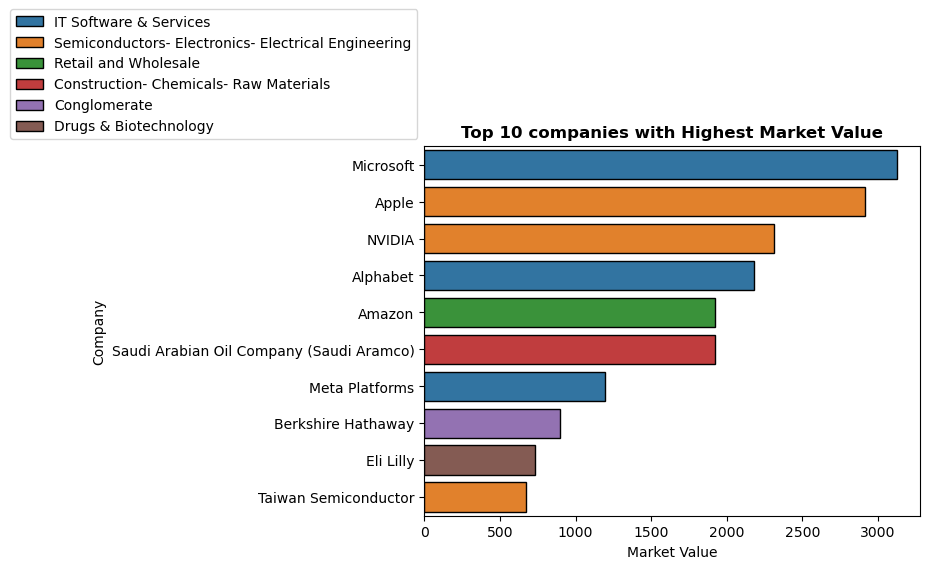

In [56]:
def bar_plot(df):
    sns.barplot(x = "Market_value", y = "Name", hue = 'Industry', data = df, edgecolor = 'black', orient = 'h')
    plt.title("Top 10 companies with Highest Market Value", fontweight = 'bold')
    plt.xlabel("Market Value")
    plt.ylabel("Company")
    plt.legend(loc = 'lower right', bbox_to_anchor = (0, 1))
    plt.show()

bar_plot(df_mv)

Top 10 companies with highest profit

In [51]:
df_pt10 = df.nlargest(10, 'Profit')
df_pt10 = df_pt10.set_index((x for x in range(1, 11)))

In [52]:
df_pt10

,Rank,Name,Sales,Profit,Assets,Market_value,Industry,Founded,Headquarters,Country,CEO,Employees,net_profit_margin,sales_asset_ratio
1,3,Saudi Arabian Oil Company (Saudi Aramco),489.1,116.9,661.5,1919.3,Construction- Chemicals- Raw Materials,1933.0,Dhahran,Saudi Arabia,Amin bin Hasan Al-Nasser,70000.0,23.901043,0.739380
2,12,Apple,381.6,100.4,337.4,2911.5,Semiconductors- Electronics- Electrical Engine...,1976.0,Cupertino- California,United States,Tim Cook,161000.0,26.310273,1.131002
3,8,Microsoft,236.6,86.2,484.3,3123.1,IT Software & Services,1975.0,Redmond- Washington,United States,Satya Nadella,122000.0,36.432798,0.488540
4,10,Alphabet,317.9,82.4,407.4,2177.7,IT Software & Services,1998.0,Mountain View- California,United States,Sundar Pichai,182502.0,25.920101,0.780314
5,2,Berkshire Hathaway,369.0,73.4,1070.0,899.1,Conglomerate,1839.0,Omaha- Nebraska,United States,Warren Edward Buffett,396500.0,19.891599,0.344860
6,4,ICBC,223.8,50.4,6586.0,215.2,Banking and Financial Services,1984.0,Beijing,China,Wang Jingwu,427587.0,22.520107,0.033981
7,1,JPMorgan Chase,252.9,50.0,4090.7,588.1,Banking and Financial Services,2000.0,New York- New York,United States,Jamie Dimon,186751.0,19.770660,0.061823
8,7,China Construction Bank,199.8,47.0,5403.8,187.5,Banking and Financial Services,1954.0,Beijing,China,Zhang Jianguo,376871.0,23.523524,0.036974
9,24,Meta Platforms,142.7,45.8,222.8,1197.0,IT Software & Services,2004.0,Menlo Park- California,United States,Mark Elliot Zuckerberg,67317.0,32.095305,0.640485
10,6,Amazon,590.7,37.7,531.0,1922.1,Retail and Wholesale,1994.0,Seattle- Washington,United States,Andrew R. Jassy,1525000.0,6.382258,1.112429


Pie chart of top 10 highest profit companies

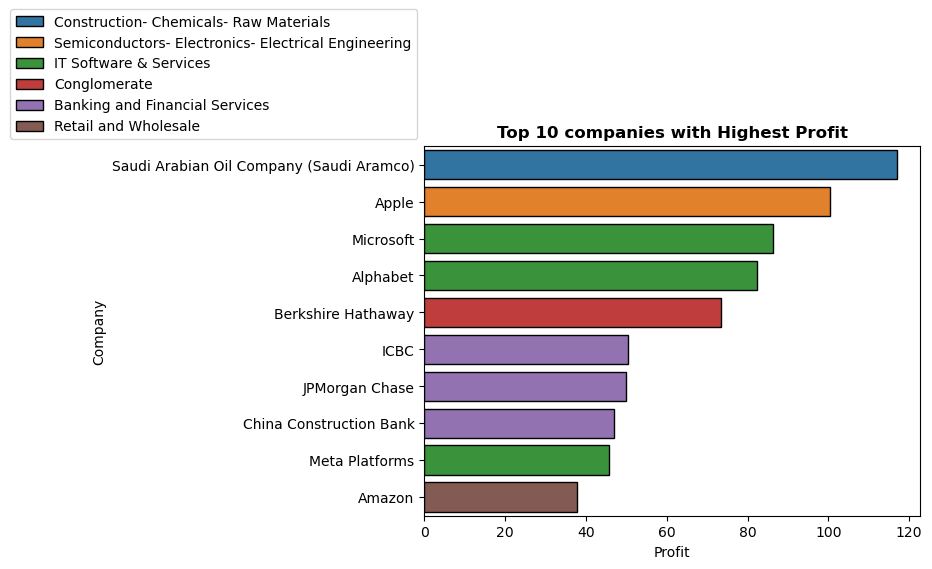

In [60]:
sns.barplot(x = "Profit", y = "Name", hue = 'Industry', data = df_pt10, edgecolor = 'black', orient = 'h')
plt.title("Top 10 companies with Highest Profit", fontweight = 'bold')
plt.xlabel("Profit")
plt.ylabel("Company")
plt.legend(loc = 'lower right', bbox_to_anchor = (0, 1))
plt.show()

Correlation

In [61]:
df.corr(numeric_only = True)

,Rank,Sales,Profit,Assets,Market_value,Founded,Employees,net_profit_margin,sales_asset_ratio
Rank,1.000000,-0.495572,-0.415282,-0.330316,-0.301608,0.054751,-0.369520,0.007578,0.072994
Sales,-0.495572,1.000000,0.663931,0.381523,0.519634,-0.017636,0.650984,-0.036205,0.203714
Profit,-0.415282,0.663931,1.000000,0.460871,0.808134,-0.009833,0.326356,0.045796,-0.029965
Assets,-0.330316,0.381523,0.460871,1.000000,0.139806,-0.014837,0.237654,-0.002679,-0.169540
Market_value,-0.301608,0.519634,0.808134,0.139806,1.000000,-0.005269,0.279551,0.013164,0.013068
Founded,0.054751,-0.017636,-0.009833,-0.014837,-0.005269,1.000000,-0.016049,0.003612,-0.004500
Employees,-0.369520,0.650984,0.326356,0.237654,0.279551,-0.016049,1.000000,-0.038681,0.160149
net_profit_margin,0.007578,-0.036205,0.045796,-0.002679,0.013164,0.003612,-0.038681,1.000000,-0.065707
sales_asset_ratio,0.072994,0.203714,-0.029965,-0.169540,0.013068,-0.004500,0.160149,-0.065707,1.000000


Regression plot between Sales and Profit

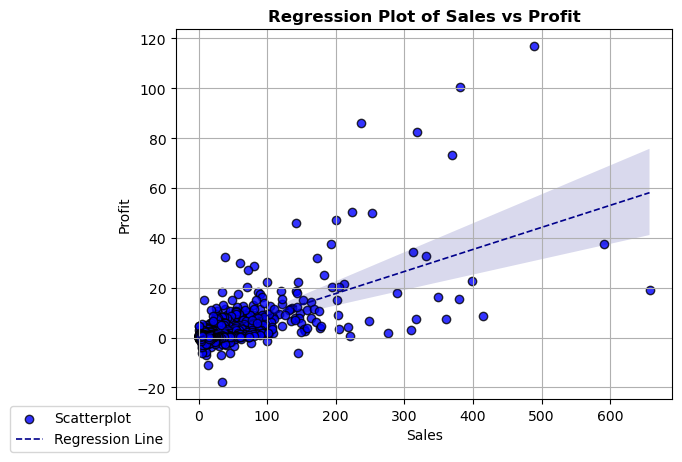

In [79]:
sns.regplot(x = 'Sales', y = 'Profit', data = df, \
            scatter_kws = {"edgecolor" : 'black', 'color' : 'blue', 'alpha' : 0.8},\
            line_kws = {'linestyle' : '--', 'color' : 'darkblue', 'linewidth' : 1.2})
plt.title("Regression Plot of Sales vs Profit", fontweight = 'bold')
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(['Scatterplot', 'Regression Line'], loc = 'upper right', bbox_to_anchor = (0, 0))
plt.grid()
plt.show()

Regression plot of Profit and Market Value

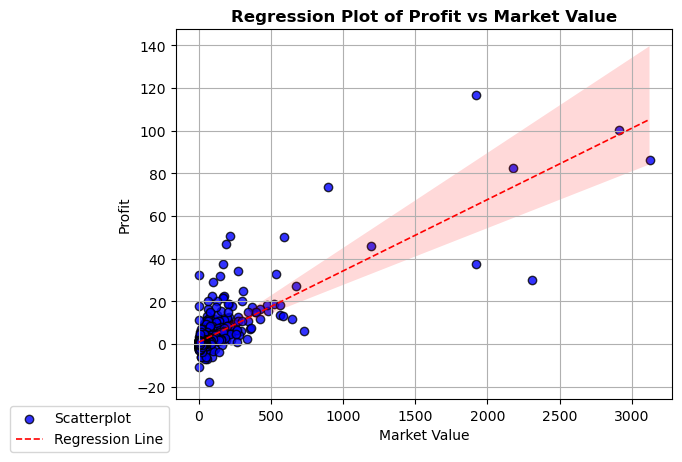

In [82]:
sns.regplot(x = 'Market_value', y = 'Profit', data = df, \
            scatter_kws = {"edgecolor" : 'black', 'color' : 'blue', 'alpha' : 0.8},\
            line_kws = {'linestyle' : '--', 'color' : 'red', 'linewidth' : 1.2})
plt.title("Regression Plot of Profit vs Market Value", fontweight = 'bold')
plt.xlabel("Market Value")
plt.ylabel("Profit")
plt.legend(['Scatterplot', 'Regression Line'], loc = 'upper right', bbox_to_anchor = (0, 0))
plt.grid()
plt.show()

Top 10 Indutries with highest Profit & Market Value

In [108]:
require = ['Sales', 'Profit', 'Market_value', 'Assets']
df_ind = df.groupby(by = 'Industry')[require].sum().reset_index()

In [109]:
df_ind

,Industry,Sales,Profit,Market_value,Assets
0,Aerospace & Defense,610.000,42.6099,1319.200,1047.7
1,Airlines,92.000,2.0000,18.400,115.5
2,Auto Brands,292.900,19.6000,128.200,400.8
3,Auto Parts,17.800,2.6000,50.500,16.7
4,Automotive,1.900,-0.1660,23.000,15.3
...,...,...,...,...,...
74,Trading Companies,506.800,13.3361,227.222,337.0
75,Transportation,896.700,68.6525,1073.298,1477.5
76,Transportation and Logistics,534.100,33.3831,533.700,734.6
77,Travel & Leisure,125.900,16.9760,383.300,235.1


In [110]:
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Industry      79 non-null     object 
 1   Sales         79 non-null     float64
 2   Profit        79 non-null     float64
 3   Market_value  79 non-null     float64
 4   Assets        79 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.2+ KB


In [111]:
df_top10pt = df_ind.nlargest(10, 'Profit')[['Industry', 'Profit']]
df_top10pt = df_top10pt.set_index((x for x in range(1, 11)))

In [112]:
df_top10pt

,Industry,Profit
1,Banking and Financial Services,620.1668
2,Banking,454.4621
3,Construction- Chemicals- Raw Materials,408.5303
4,IT Software & Services,333.6158
5,Semiconductors- Electronics- Electrical Engine...,262.2471
6,Insurance,208.3507
7,Oil & Gas Operations,147.6800
8,Utilities,144.3645
9,Automotive (Automotive and Suppliers),133.7486
10,Diversified Financials,130.3802


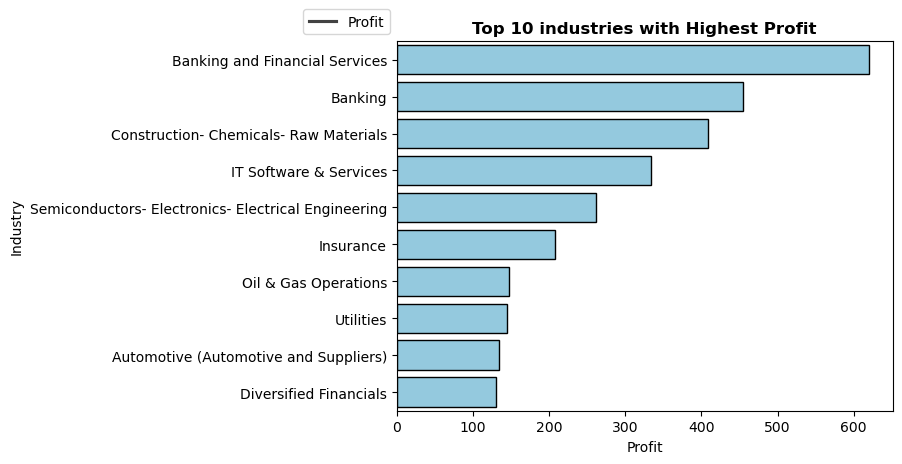

In [129]:
sns.barplot(x = "Profit", y = "Industry", color = 'skyblue', data = df_top10pt, edgecolor = 'black', orient = 'h')
plt.title("Top 10 industries with Highest Profit", fontweight = 'bold')
plt.xlabel("Profit")
plt.ylabel("Industry")
plt.legend(['Profit'], loc = 'lower right', bbox_to_anchor = (0, 1))
plt.show()

In [130]:
df_top10mv = df_ind.nlargest(10, 'Market_value')[['Industry', 'Market_value']]
df_top10mv = df_top10mv.set_index((x for x in range(1, 11)))

In [138]:
df_top10mv

,Industry,Market_value
1,IT Software & Services,11404.200
2,Semiconductors- Electronics- Electrical Engine...,9684.400
3,Banking and Financial Services,7183.800
4,Construction- Chemicals- Raw Materials,6256.232
5,Drugs & Biotechnology,4505.400
6,Retail and Wholesale,3800.900
7,Banking,3132.075
8,Insurance,2925.949
9,Engineering- Manufacturing,2683.000
10,Utilities,2555.000


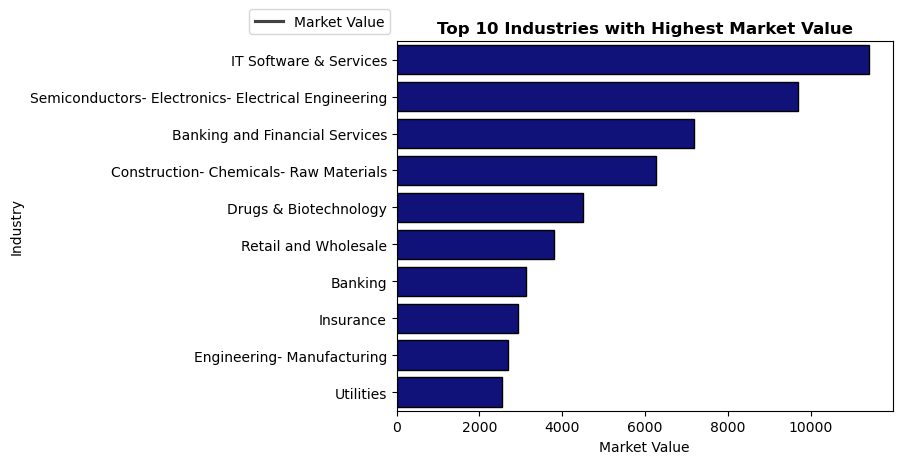

In [139]:
sns.barplot(x = "Market_value", y = "Industry", color = 'darkblue', data = df_top10mv, edgecolor = 'black', orient = 'h')
plt.title("Top 10 Industries with Highest Market Value", fontweight = 'bold')
plt.xlabel("Market Value")
plt.ylabel("Industry")
plt.legend(['Market Value'], loc = 'lower right', bbox_to_anchor = (0, 1))
plt.show()

Grouping by countries to find top 10 countries with highest profit and market value


In [140]:
df_con = df.groupby(by = "Country")[require].sum().reset_index()

In [141]:
df_con

,Country,Sales,Profit,Market_value,Assets
0,Argentina,35.300,2.1000,95.200,31.8
1,Australia,546.823,53.0804,1103.000,3966.0
2,Austria,153.000,12.9197,97.100,845.8
3,Belgium,157.200,15.2327,233.200,770.0
4,Bermuda,97.100,14.1010,98.200,349.9
5,Brazil,646.200,58.5615,516.700,2156.2
6,Canada,1265.800,109.4086,2047.800,9508.9
7,Cayman Islands,8.100,1.3000,55.600,43.8
8,Chile,99.600,5.1381,52.400,264.5
9,China,8120.358,628.8699,6593.827,57730.2


In [142]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       59 non-null     object 
 1   Sales         59 non-null     float64
 2   Profit        59 non-null     float64
 3   Market_value  59 non-null     float64
 4   Assets        59 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.4+ KB


In [144]:
df_con_mv = df_con.nlargest(10, 'Market_value')[['Country', 'Market_value']].set_index((x for x in range(1, 11)))

In [145]:
df_con_mv

,Country,Market_value
1,United States,48067.921
2,China,6593.827
3,Japan,4043.445
4,France,2882.000
5,United Kingdom,2774.300
6,India,2371.700
7,Saudi Arabia,2249.900
8,Canada,2047.800
9,Switzerland,1975.112
10,Germany,1724.969


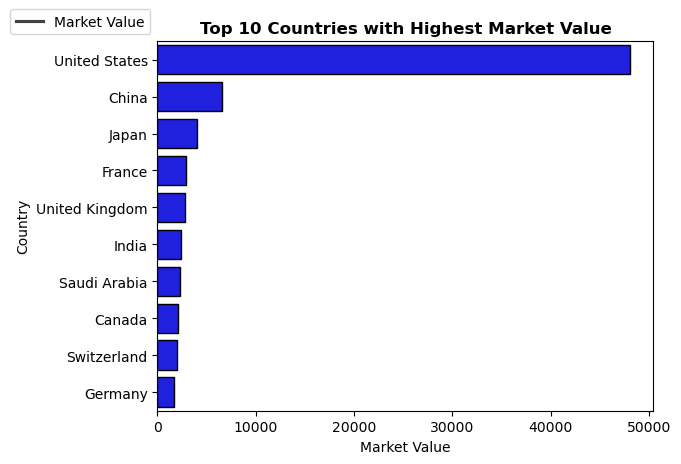

In [151]:
sns.barplot(x = "Market_value", y = "Country", color = 'blue', data = df_con_mv, edgecolor = 'black', orient = 'h')
plt.title("Top 10 Countries with Highest Market Value", fontweight = 'bold')
plt.xlabel("Market Value")
plt.ylabel("Country")
plt.legend(['Market Value'], loc = 'lower right', bbox_to_anchor = (0, 1))
plt.show()

In [152]:
df_con_pt = df_con.nlargest(10, 'Profit')[['Country', 'Profit']].set_index((x for x in range(1, 11)))

In [153]:
df_con_pt

,Country,Profit
1,United States,1764.5838
2,China,628.8699
3,Japan,279.4713
4,Switzerland,159.8242
5,United Kingdom,157.5518
6,France,148.0711
7,Saudi Arabia,140.7501
8,India,120.2491
9,Canada,109.4086
10,Germany,101.9183


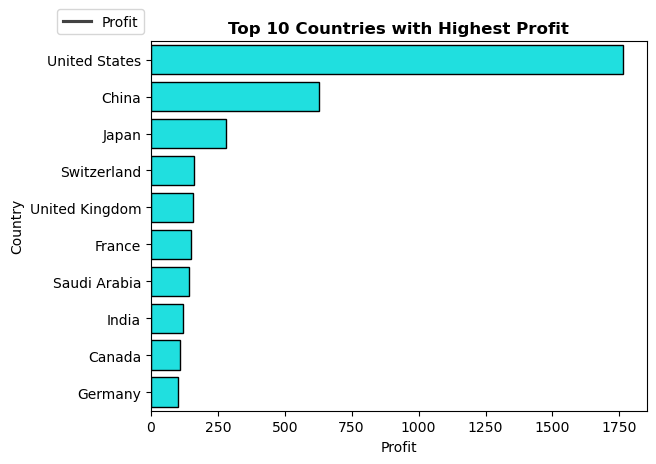

In [156]:
sns.barplot(x = "Profit", y = "Country", color = 'cyan', data = df_con_pt, edgecolor = 'black', orient = 'h')
plt.title("Top 10 Countries with Highest Profit", fontweight = 'bold')
plt.xlabel("Profit")
plt.ylabel("Country")
plt.legend(['Profit'], loc = 'lower right', bbox_to_anchor = (0, 1))
plt.show()